# Import required libraries & Flight_Ticket dataset

In [1]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [2]:
#import flight ticket prediction data files

df_train=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

df_test=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [3]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
# Checking null values & data type of all columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


It shows that Route , Total_Stops column having only 1 null value.

In [5]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Airline','Date_of_Journey','Source','Dep_Time','Arrival_Time','Duration','Destination','Additional_Info']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])  # if numpy instead of pandas use X[:, column] instead

Column name 'Total_Stops' , 'Route' are not converted into integer

# Raplace NaN values as below-

In [6]:
import numpy as np
df_train['Route'].replace(np.NaN,df_train['Route'].mean,inplace=True)
df_train['Total_Stops'].replace(np.NaN,df_train['Total_Stops'].mean,inplace=True)

In [7]:
#Check null values & datatypes after changing datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  int32 
 1   Date_of_Journey  10683 non-null  int32 
 2   Source           10683 non-null  int32 
 3   Destination      10683 non-null  int32 
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  int32 
 6   Arrival_Time     10683 non-null  int32 
 7   Duration         10683 non-null  int32 
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  int32 
 10  Price            10683 non-null  int64 
dtypes: int32(8), int64(1), object(2)
memory usage: 584.4+ KB


In [8]:
# Checking summery statistics for all numeric coluns of train dataset
df_train.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,107.980717,869.828419,194.069269,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,61.085563,331.509504,108.620556,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,55.000000,603.000000,106.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,96.000000,937.000000,233.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,164.000000,1141.000000,280.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,221.000000,1342.000000,367.000000,9.000000,79512.000000


In [9]:
# Checking for skewness
df_train.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -1.779838
Price              1.812552
dtype: float64

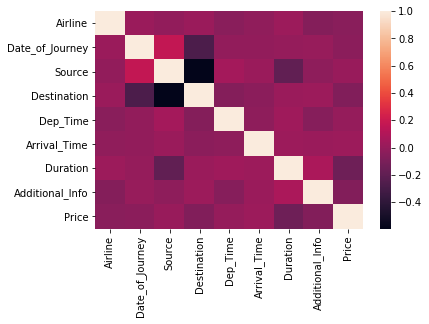

In [10]:
# checking correlation
df_train_cor=df_train.corr()
sns.heatmap(df_train_cor)

Above plot shows Destination & source dont have any co-relation in between,no correlation in between all other columns

In [11]:
import pandas as pd

cols = df_train.columns.tolist()
print(cols)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']


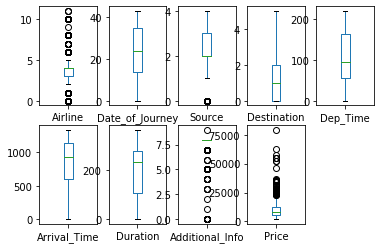

In [12]:
# Data Visualization - Unvariate plot (box and whisker plots)

df_train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

As per above plot Airline, Additional_Info, Price columns having outliers. 

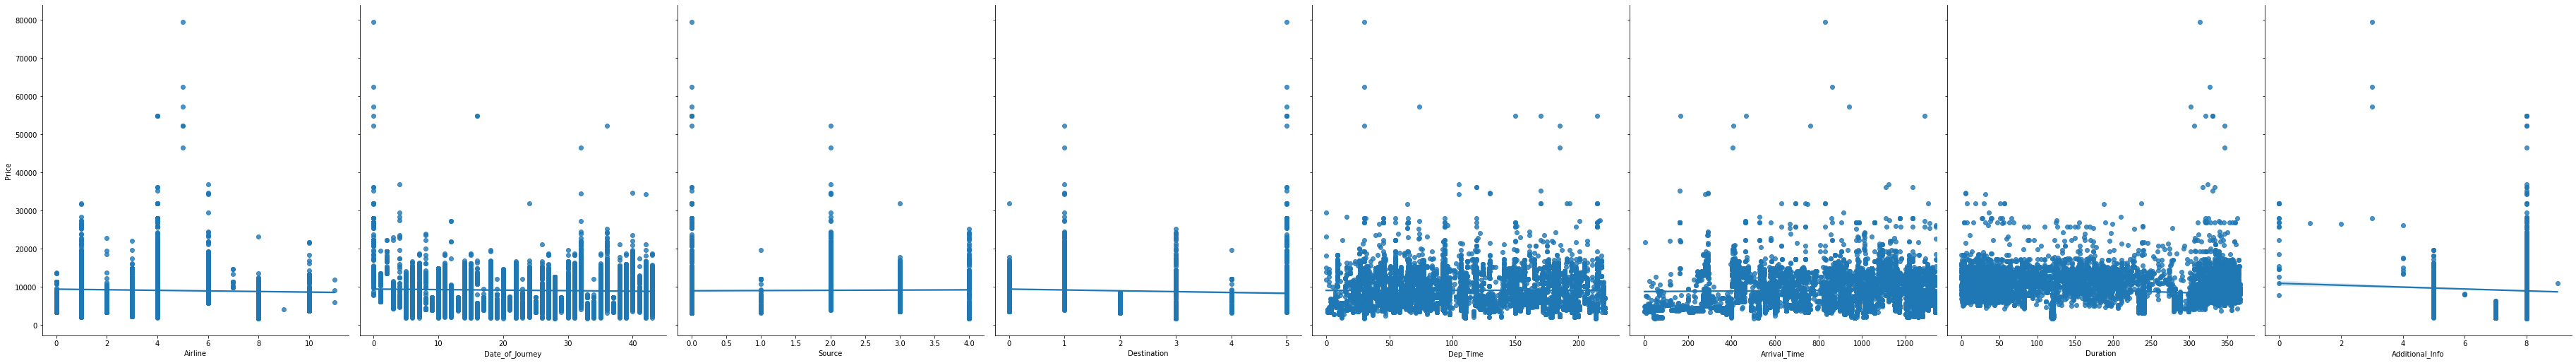

In [13]:
# Bivariate Visualization - draw Scatter plot for linear regression

sns.pairplot(df_train, x_vars=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], y_vars='Price', size=7, aspect=0.9, kind='reg')
plt.show()

As per above plot cloumns Date_of_Journey, Dep_Time , Arrival_Time, Duration have data densly available.

# Preparing X & y 

In [14]:
import pandas as pd

X = df_train[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info']]
y = df_train.Price        # y is a vector, hence we use dot to access 'label'

In [18]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(10683, 8)


In [19]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(10683,)


In [20]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# train a logistic regression model on the training set as target(region) is having categorical values.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.030889235569422777


In [24]:
# Load libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the flight ticket datasets
# prepare a range of alpha values to test

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.03294270379868902
1.0


In [26]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the flight datasets
dataset = df_train

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train,y_train)
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002585DDC84C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.03294270225780662
0.9938055702776081


In [27]:
# Linear regression in scikit-learn ; Using Linear Regression reason being target values are continuos
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Interpreting model coefficients
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

13159.31927902716
[ -78.97719014  -19.76298847 -252.41387818 -392.37422113   -0.42185205
    0.44995572   -6.50642887 -173.02240377]


In [30]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [31]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  3490.707292220145
Mean Sqr Error:    19433080.644700572
Root mean sqr error:  4408.296796348967


In [34]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.0001)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.0001)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 94  is  0.6184373996105885


In [35]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

-0.014036413727831041
-0.020364180073563887
-0.019992796428647708


In [37]:
# Check for which K value RMSE is lowest; here K=1 gives RMSE = 2153

from sklearn import neighbors
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier as KNN

rmse_val = []      # to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  # fit the model
    pred=model.predict(X_test)   # make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error)       # store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2153.1401487130374
RMSE value for k=  2 is: 2569.6596321302945
RMSE value for k=  3 is: 3304.3470526632714
RMSE value for k=  4 is: 1918.7746903948885
RMSE value for k=  5 is: 1705.2336496797154
RMSE value for k=  6 is: 974.702782333614
RMSE value for k=  7 is: 1862.449478838148
RMSE value for k=  8 is: 1169.237919544179
RMSE value for k=  9 is: 928.1232623544447
RMSE value for k=  10 is: 707.0486051184884


In [46]:
# import KNeighborsClassifier model 

from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors = 1) 
  
# train model 
knn.fit(X_train, y_train)
print(knn.score(X_train,y_train))

0.9772493212246044


In [47]:
from sklearn.externals import joblib

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file
score = joblib_knn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear regression: {0:.2f} %".format(100 * score))

Test score for linear regression: 50.00 %


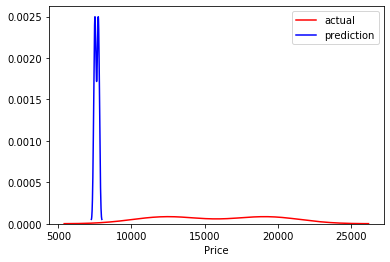

In [48]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-This model gives accuracy score as 97% for KNN & Test score is 50% which is less.
Model suffering from overfitting after using grid search cv.